In [4]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf  #GRADIENT descent for optimisation
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import sklearn.linear_model, sklearn.datasets
from sklearn import kernel_ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler # We will be using the imbuilt sclaing functions sklearn provides
from sklearn.preprocessing import PolynomialFeatures # A preprocessing function allowing us to include polynomial features into our model


In [5]:
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # We will be using the inbuilt preprocessing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error

In [6]:
from IPython.testing import test
from google.colab import files

salarydata = pd.read_csv('salarydata.csv')

test = salarydata.copy() #note we are using the dataset with no missing values
salarydata.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary
0,32,314.06,30.14,0,Degree,Private sector,Male,London,60173.49
1,20,3758.36,149.36,4,GCSE,Private sector,Female,South East,42965.45
2,36,601.72,21.87,0,Masters,Private sector,Male,East of England,54924.41
3,21,44.89,182.80,9,Masters,Private sector,Female,Northern Ireland,26734.99
4,24,614.80,194.34,0,GCSE,Private sector,Male,Scotland,15325.23


In [7]:
data_v2 = salarydata.copy()

lblEncoder_X = LabelEncoder()

data_v2['Sex'] = lblEncoder_X.fit_transform(data_v2['Sex'])
data_v2['SiteTime'] = lblEncoder_X.fit_transform(data_v2['SiteTime'])

#onehotencoding
oneHotEncoder = OneHotEncoder()

onehot_enc = oneHotEncoder.fit(data_v2[['Education']])
OHT = onehot_enc.transform(data_v2[['Education']]).toarray()

data_v2['Education-A Level'] = OHT[:,0]
data_v2['Education-Degree'] = OHT[:,1]
data_v2['Education-GCSE'] = OHT[:,2]
data_v2['Education-Masters'] = OHT[:,3]
data_v2['Education-None'] = OHT[:,4]
data_v2['Education-Other'] = OHT[:,5]
data_v2['Education-PhD'] = OHT[:,6]

OHT2 = oneHotEncoder.fit(data_v2[['Region']])
OHT2 = onehot_enc.transform(data_v2[['Region']]).toarray()

data_v2['East Midlands'] = OHT2[:,0]
data_v2['East of England'] = OHT2[:,1]
data_v2['London'] = OHT2[:,2]
data_v2['North East'] = OHT2[:,3]
data_v2['North West'] = OHT2[:,4]
data_v2['Northern Ireland'] = OHT2[:,5]
data_v2['Scotland'] = OHT2[:,6]
data_v2['South East'] = OHT2[:,7]
data_v2['South West'] = OHT2[:,8]
data_v2['Wales'] = OHT2[:,9]
data_v2['West Midlands'] = OHT2[:,10]
data_v2['Yorkshire and The Humber'] = OHT2[:,11]


OHT3 = oneHotEncoder.fit(data_v2[['WorkType']])
OHT3 = onehot_enc.transform(data_v2[['WorkType']]).toarray()


data_v2['Private sector'] = OHT3[:,0]
data_v2['Public Sector'] = OHT3[:,1]
data_v2['Self Employed'] = OHT3[:,2]
data_v2['Unemployed'] = OHT3[:,3]

data_v2.head()

,Age,SiteSpending,SiteTime,RecommendImpression,Education,WorkType,Sex,Region,Salary,Education-A Level,...,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber,Private sector,Public Sector,Self Employed,Unemployed
0,32,314.06,96,0,Degree,Private sector,1,London,60173.49,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,20,3758.36,476,4,GCSE,Private sector,0,South East,42965.45,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,36,601.72,69,0,Masters,Private sector,1,East of England,54924.41,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21,44.89,597,9,Masters,Private sector,0,Northern Ireland,26734.99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,24,614.80,637,0,GCSE,Private sector,1,Scotland,15325.23,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
data_v2.corr()['Salary'].sort_values()

<ipython-input-8-51dce403e2cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_v2.corr()['Salary'].sort_values()


Education-None             -0.124492
Education-GCSE             -0.086672
Yorkshire and The Humber   -0.083425
Wales                      -0.081485
Self Employed              -0.059198
East Midlands              -0.057482
North West                 -0.049978
Unemployed                 -0.040195
South West                 -0.036940
Education-A Level          -0.035137
West Midlands              -0.030012
Public Sector              -0.028943
Northern Ireland           -0.010579
East of England            -0.004928
Education-Masters          -0.002977
North East                  0.006146
Education-Other             0.028286
Education-Degree            0.060593
South East                  0.061493
Age                         0.065636
Private sector              0.070012
Education-PhD               0.087840
Scotland                    0.090172
Sex                         0.106657
London                      0.109510
SiteTime                    0.199772
SiteSpending                0.336214
R

In [24]:
#col_fin = ['SiteSpending','RecommendImpression', 'SiteTime']

#col_fin = ['SiteSpending','RecommendImpression', 'SiteTime', 'London','Sex', 'Scotland', 'Education-PhD','Private sector', 'Age','Education-None','Education-GCSE','Yorkshire and The Humber']

col_fin = ['SiteSpending','RecommendImpression', 'SiteTime',
           'London','Sex', 'Scotland', 'Education-PhD',
           'Age','South East', 'Education-None','Education-GCSE','Yorkshire and The Humber','Wales']

tar = ['Salary']

#converted my columns to vector

X = np.array(data_v2[col_fin])
y = np.array(data_v2[tar])




In [25]:
n_train_points = 800
n_new_points = 200
X_train = X[:n_train_points] # This will select the data points from 0 to the number defined in n_train_points (200 in this case)
X_new = X[n_train_points:n_train_points+n_new_points]

y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

In [26]:


obj = sklearn.linear_model.LinearRegression(fit_intercept=True)
obj.fit(X_train, y_train)

y_pred = obj.predict(X_new)




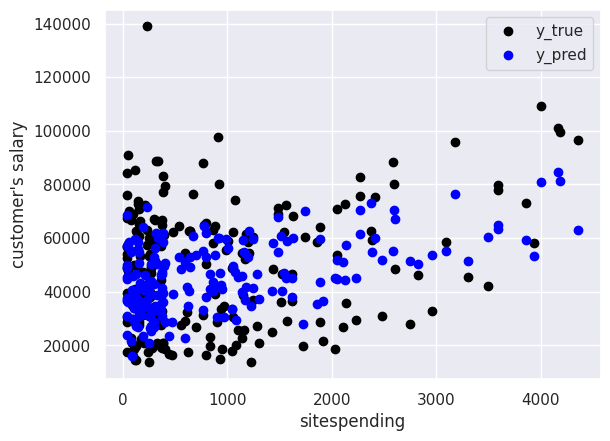

Mean squared error loss: 336542828.8405
R2 score: 0.3730


In [27]:
X_new_disp = X_new[:,0]

#plt.scatter(y_train, color='blue', label='y_pred') # predicted y values
plt.scatter(X_new_disp, y_true,  color='black', label='y_true') # Observed y values
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred') # predicted y values

plt.xlabel('sitespending')
plt.ylabel("customer's salary")
plt.legend()
plt.show()

print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_true, y_pred)))
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_true, y_pred)))




In [28]:

X_non_test_raw, X_test_raw, y_non_test, y_test = train_test_split(X, y, test_size=0.10, shuffle=True, random_state=0)
X_train_raw, X_valid_raw, y_train, y_valid = train_test_split(X_non_test_raw, y_non_test, test_size=0.10, shuffle=True, random_state=0)

model = sklearn.linear_model.LinearRegression(fit_intercept=True) # Create our prediction model object
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler() # Here is our standardisation object

# Training
##########
# Create Polynomial features BEFORE standardisation
poly.fit(X_train_raw) # Fit polynomial features on our raw training data
X_train_poly = poly.transform(X_train_raw) # transform our raw data using the poly object

#standatdisation object
scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)

#fit(train) the model
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train) # Use our fitted linear regression model to make a prediction
mse_train = mean_squared_error(y_train, y_pred_train) # Calculate the Mean Squared Error for our training data predictions
print('MSE on training data:', mse_train)

# Validation
# Create Polynomial features BEFORE standardisation


X_valid_poly = poly.transform(X_valid_raw)
X_valid = scaler.transform(X_valid_poly)

y_pred_valid = model.predict(X_valid) # Use our fitted linear regression model to make a prediction based on teh validation dataset
mse_valid = mean_squared_error(y_valid, y_pred_valid)  # Calculate the Mean Squared Error for our validation data predictions
print('MSE on validation data:', mse_valid)

print('poly degree 2 is the best')


MSE on training data: 110586208.64298955
MSE on validation data: 122475632.44583824
poly degree 2 is the best


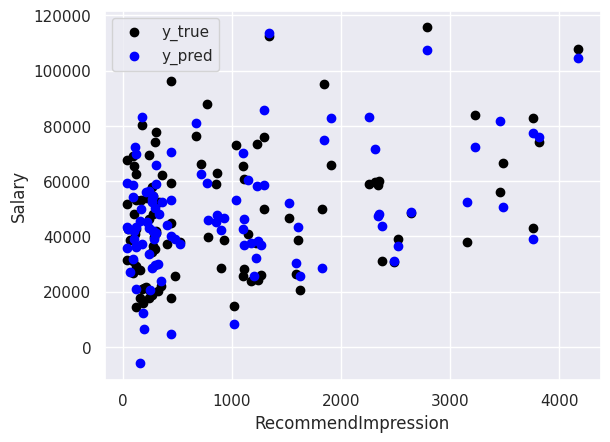

MSE on the test data: 171557397.19795775
R2 score: 0.6719


In [29]:
model = sklearn.linear_model.LinearRegression(fit_intercept=True)
poly = PolynomialFeatures(degree=2) # use the degree we selected above
scaler = StandardScaler()


poly.fit(X_train_raw)
X_train_poly = poly.transform(X_train_raw)
scaler.fit(X_train_poly)
X_train = scaler.transform(X_train_poly)
model.fit(X_train, y_train)

X_test_poly = poly.transform(X_test_raw)
X_test = scaler.transform(X_test_poly)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)



plt.scatter(X_test_raw[:,0], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test_raw[:,0], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('RecommendImpression')
plt.ylabel('Salary')
plt.legend()
plt.show()

print('MSE on the test data:', mse_test) # check our testing MSE, is it signficantly different from our validation MSE?

print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))


**BINARY CLASSIFICAION**

In [30]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [32]:
#creating binomial values for target value
data_v2.loc[data_v2['Salary'] > 35000, 'target'] = '1'
data_v2.loc[data_v2['Salary'] <= 35000, 'target'] = '0'

clas_data = data_v2.copy()

clas_data = clas_data.drop(columns=['RecommendImpression','Education'])

display(clas_data.head())
#only numerical values

,Age,SiteSpending,SiteTime,WorkType,Sex,Region,Salary,Education-A Level,Education-Degree,Education-GCSE,...,South East,South West,Wales,West Midlands,Yorkshire and The Humber,Private sector,Public Sector,Self Employed,Unemployed,target
0,32,314.06,96,Private sector,1,London,60173.49,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,20,3758.36,476,Private sector,0,South East,42965.45,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,36,601.72,69,Private sector,1,East of England,54924.41,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,21,44.89,597,Private sector,0,Northern Ireland,26734.99,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,24,614.80,637,Private sector,1,Scotland,15325.23,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [33]:
#sns.countplot(x='target', data=salarydata, palette='hls')

<ipython-input-34-834409f411e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clas_data.corr())


<Axes: >

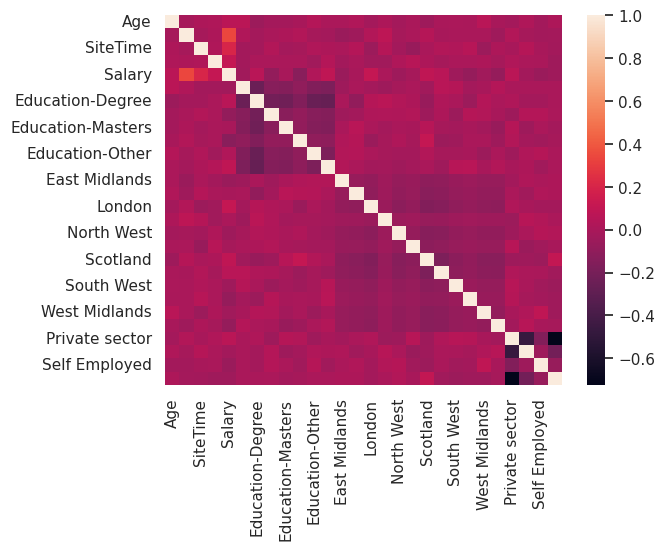

In [34]:
#the lighter color the bigger corr

sns.heatmap(clas_data.corr())

In [35]:
clas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   int64  
 1   SiteSpending              1000 non-null   float64
 2   SiteTime                  1000 non-null   int64  
 3   WorkType                  1000 non-null   object 
 4   Sex                       1000 non-null   int64  
 5   Region                    1000 non-null   object 
 6   Salary                    1000 non-null   float64
 7   Education-A Level         1000 non-null   float64
 8   Education-Degree          1000 non-null   float64
 9   Education-GCSE            1000 non-null   float64
 10  Education-Masters         1000 non-null   float64
 11  Education-None            1000 non-null   float64
 12  Education-Other           1000 non-null   float64
 13  Education-PhD             1000 non-null   float64
 14  East Midl

In [43]:
columns_to_drop = ['WorkType', 'Region']
df_dropped = clas_data.drop(columns=columns_to_drop)

print(df_dropped)

     Age  SiteSpending  SiteTime  Sex    Salary  Education-A Level  \
0     32        314.06        96    1  60173.49                0.0   
1     20       3758.36       476    0  42965.45                0.0   
2     36        601.72        69    1  54924.41                0.0   
3     21         44.89       597    0  26734.99                0.0   
4     24        614.80       637    1  15325.23                0.0   
..   ...           ...       ...  ...       ...                ...   
995   56        177.67       883    0  22306.84                0.0   
996   54        155.42       767    1  27704.97                0.0   
997   22       2376.10       934    1  62542.89                0.0   
998   49       4355.04        85    1  96745.84                0.0   
999   51         40.43       620    1  48651.47                0.0   

     Education-Degree  Education-GCSE  Education-Masters  Education-None  ...  \
0                 1.0             0.0                0.0             0.0  ... 

In [44]:
#splitting data

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(df_dropped.drop('target', axis = 1), clas_data['target'] , test_size=0.2, random_state=200)


#to see y_train is 1 row

print(X_train_c.shape)
print(y_train_c.shape)

#X_train_c[0:5]
#y_train_c[0:5]

(800, 28)
(800,)


In [45]:
X_train_c

,Age,SiteSpending,SiteTime,Sex,Salary,Education-A Level,Education-Degree,Education-GCSE,Education-Masters,Education-None,...,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber,Private sector,Public Sector,Self Employed,Unemployed
989,44,157.68,798,1,60824.38,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
835,33,1010.66,956,1,59015.55,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
678,45,514.78,94,0,60791.22,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
177,27,1972.98,64,0,25195.93,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
410,44,2715.16,433,0,71770.67,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,31,88.26,730,1,29669.84,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
836,30,1171.46,71,1,52210.71,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
784,65,1200.20,644,0,24542.07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
617,72,1573.58,199,1,26016.65,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train_c, y_train_c)



LogisticRegression(solver='liblinear')

In [48]:
y_pred_c = LogReg.predict(X_test_c)

In [49]:
#model evaluation


print(classification_report(y_test_c, y_pred_c))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        70
           1       0.90      0.91      0.90       130

    accuracy                           0.88       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.87      0.88      0.87       200



In [50]:
#confusion matrix

y_train_pred_c = cross_val_predict(LogReg, X_train_c, y_train_c, cv=5)
confusion_matrix(y_train_c, y_train_pred_c)

# 79 and 423 correct, rest incorrect predictions

array([[220,  79],
       [ 38, 463]])

Precision on validation data: 0.8542435424354243
Accuracy on validation data: 0.85375
Precision on validation data: 0.8542435424354243
Recall on validation data: 0.9241516966067864
F1 score on validation data regarding '1' as a positive class: 0.8878235858101631
              precision    recall  f1-score   support

           0       0.85      0.74      0.79       299
           1       0.85      0.92      0.89       501

    accuracy                           0.85       800
   macro avg       0.85      0.83      0.84       800
weighted avg       0.85      0.85      0.85       800



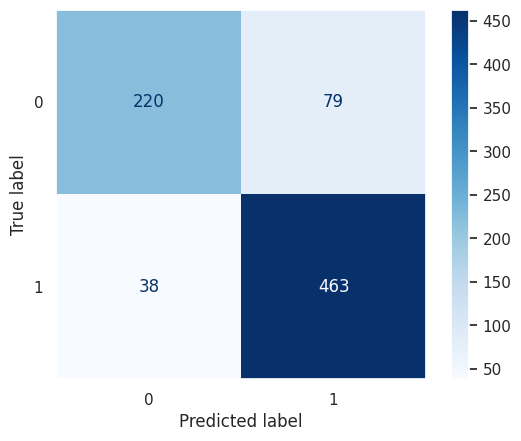

In [51]:
#evaluation metrics

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report

disp = ConfusionMatrixDisplay(confusion_matrix(y_train_c, y_train_pred_c))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

pre_test = precision_score(y_train_c, y_train_pred_c, pos_label='1')
print('Precision on validation data:', pre_test)


acc_valid = accuracy_score(y_train_c, y_train_pred_c)
print('Accuracy on validation data:', acc_valid)
pre_valid = precision_score(y_train_c, y_train_pred_c, pos_label='1')
print('Precision on validation data:', pre_valid)
reca_valid = recall_score(y_train_c, y_train_pred_c, pos_label='1')
print('Recall on validation data:', reca_valid)
f1_valid = f1_score(y_train_c, y_train_pred_c, pos_label='1')
print('F1 score on validation data regarding \'1\' as a positive class:', f1_valid)
print(classification_report(y_train_c, y_train_pred_c))



